# ***`CLASSIFICATION`***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier


# ***`Dataset Link - https://www.kaggle.com/datasets/jeevanrh/drug200csv`***

In [ ]:
df = pd.read_csv("/content/drug200.csv")

In [ ]:
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [ ]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

In [ ]:
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
X = df.drop(columns=['Drug'])
y = df['Drug']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#BaggingClassifier

In [ ]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred = bagging_dt.predict(X_test)

print("Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Bagging Results:
Accuracy: 0.975
Precision: 0.9763157894736842
Recall: 0.975
F1 Score: 0.9747425997425998


In [ ]:
bagging_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
bagging_lr.fit(X_train, y_train)
y_pred = bagging_lr.predict(X_test)

print("Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Bagging Results:
Accuracy: 0.875
Precision: 0.8826973684210525
Recall: 0.875
F1 Score: 0.8741891891891893


In [ ]:
bagging_svc = BaggingClassifier(estimator=SVC(probability =True), n_estimators=50, random_state=42)
bagging_svc.fit(X_train, y_train)
y_pred = bagging_svc.predict(X_test)

print("Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Bagging Results:
Accuracy: 0.9
Precision: 0.9129464285714285
Recall: 0.9
F1 Score: 0.8990588235294117


In [ ]:
bagging = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print("Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Bagging Results:
Accuracy: 0.875
Precision: 0.8881302521008404
Recall: 0.875
F1 Score: 0.8738253968253968


#RandomForest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Random Forest Results:
Accuracy: 0.975
Precision: 0.9763157894736842
Recall: 0.975
F1 Score: 0.9747425997425998


#AdaBoost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

AdaBoost Results:
Accuracy: 0.825
Precision: 0.7159792510121458
Recall: 0.825
F1 Score: 0.7631583506583508


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


XGBoost Results:
Accuracy: 0.975
Precision: 0.98125
Recall: 0.975
F1 Score: 0.976190476190476


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:30:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#Gradient Boosting

In [ ]:
gboost = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100, random_state=42)
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Gradient Boosting Results:
Accuracy: 0.925
Precision: 0.93
Recall: 0.925
F1 Score: 0.9224269005847953


#Voting Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)

voting_hard = VotingClassifier(estimators=[("dt", dt), ("lr", lr), ("svc", svc)], voting="hard") #hard : Majority Voting
voting_hard.fit(X_train, y_train)
y_pred = voting_hard.predict(X_test)

print("Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Voting Classifier Results:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)

voting_soft = VotingClassifier(estimators=[("dt", dt), ("lr", lr), ("svc", svc)], voting="soft") #soft : probability based
voting_soft.fit(X_train, y_train)
y_pred = voting_soft.predict(X_test)

print("Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Voting Classifier Results:
Accuracy: 0.975
Precision: 0.9763157894736842
Recall: 0.975
F1 Score: 0.9747425997425998


#Stacking Classifier

In [ ]:
stacking = StackingClassifier(
    estimators=[("dt", DecisionTreeClassifier()), ("lr", LogisticRegression(max_iter=1000)), ("svc", SVC(probability=True))],
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Stacking Classifier Results:
Accuracy: 0.975
Precision: 0.9763157894736842
Recall: 0.975
F1 Score: 0.9747425997425998


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

stacking = StackingClassifier(
    estimators=[("knn", KNeighborsClassifier()), ("lr", LogisticRegression(max_iter=1000)), ("svc", SVC(probability=True))],
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Stacking Classifier Results:
Accuracy: 0.9
Precision: 0.9076923076923077
Recall: 0.9
F1 Score: 0.8970833333333331


In [ ]:
stacking = StackingClassifier(
    estimators=[("knn", KNeighborsClassifier()), ("dt", DecisionTreeClassifier()), ("svc", SVC(probability=True))],
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Stacking Classifier Results:
Accuracy: 0.975
Precision: 0.9763157894736842
Recall: 0.975
F1 Score: 0.9747425997425998


/tmp/ipython-input-909182520.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(acc_results.keys()), y=list(acc_results.values()),palette="viridis")


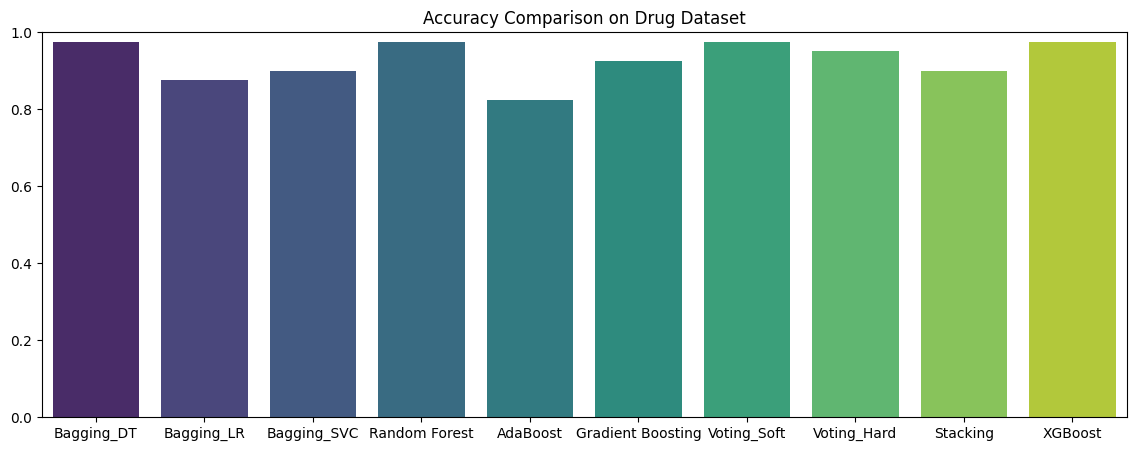

In [ ]:
acc_results = {
    "Bagging_DT": accuracy_score(y_test, bagging_dt.predict(X_test)),
    "Bagging_LR": accuracy_score(y_test, bagging_lr.predict(X_test)),
    "Bagging_SVC": accuracy_score(y_test, bagging_svc.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf.predict(X_test)),
    "AdaBoost": accuracy_score(y_test, ada.predict(X_test)),
    "Gradient Boosting": accuracy_score(y_test, gboost.predict(X_test)),
    "Voting_Soft": accuracy_score(y_test, voting_soft.predict(X_test)),
    "Voting_Hard": accuracy_score(y_test, voting_hard.predict(X_test)),
    "Stacking": accuracy_score(y_test, stacking.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb.predict(X_test))
}

plt.figure(figsize=(14,5))
sns.barplot(x=list(acc_results.keys()), y=list(acc_results.values()),palette="viridis")
plt.title("Accuracy Comparison on Drug Dataset")
plt.ylim(0,1)
plt.show()

# ***`Regression`***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


# ***`Dataset Link - https://www.kaggle.com/datasets/mirichoi0218/insurance`***

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
# We initialize dictionary to store all model results
reg_results = {}

In [ ]:
print("Data head:")
print(df.head())

Data head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [ ]:
categorical_cols = ['sex', 'smoker', 'region']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
X_reg = df_processed.drop(columns=['charges'])
y_reg = df_processed['charges']

print("Processed Data Head (X):")
print(X_reg.head())

Processed Data Head (X):
   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Standardize all features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


In [ ]:
print(f"X_train shape: {X_train_reg_scaled.shape}")
print(f"X_test shape: {X_test_reg_scaled.shape}")

X_train shape: (1070, 8)
X_test shape: (268, 8)


# ***`Linear Regression (Base Learner)`***

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr = lr_reg.predict(X_test_reg_scaled)

name = "Linear Regression"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_lr),
    "R2": r2_score(y_test_reg, y_pred_lr)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Linear Regression Results
MSE: 33596915.8514
R2 Score: 0.7836


# ***`Decision Tree Regressor (Base Learner)`***

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_dt = dt_reg.predict(X_test_reg_scaled)

name = "Decision Tree"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_dt),
    "R2": r2_score(y_test_reg, y_pred_dt)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Decision Tree Results
MSE: 40795333.4541
R2 Score: 0.7372


# ***`SVR (Base Learner)`***

In [ ]:
svr_reg = SVR()
svr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = svr_reg.predict(X_test_reg_scaled)

name = "SVR"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_svr),
    "R2": r2_score(y_test_reg, y_pred_svr)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

SVR Results
MSE: 166128803.8085
R2 Score: -0.0701


# ***`Bagging Regressor - Decision Tree`***

In [ ]:
bagging_dt_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42,
)
bagging_dt_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_bag_dt = bagging_dt_reg.predict(X_test_reg_scaled)

name = "Bagging_DT"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_bag_dt),
    "R2": r2_score(y_test_reg, y_pred_bag_dt)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Bagging_DT Results
MSE: 20870764.9100
R2 Score: 0.8656


# ***`Bagging Regressor - Linear Regressor`***

In [ ]:
bagging_lr_reg = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=100,
    random_state=42,
)
bagging_lr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_bag_lr = bagging_lr_reg.predict(X_test_reg_scaled)

name = "Bagging_LR"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_bag_lr),
    "R2": r2_score(y_test_reg, y_pred_bag_lr)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Bagging_LR Results
MSE: 33711752.4911
R2 Score: 0.7829


# ***`Bagging Regressor - SVR`***

In [ ]:
bagging_svr_reg = BaggingRegressor(
    estimator=SVR(),
    n_estimators=100,
    random_state=42,
)
bagging_svr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_bag_svr = bagging_svr_reg.predict(X_test_reg_scaled)

name = "Bagging_SVR"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_bag_svr),
    "R2": r2_score(y_test_reg, y_pred_bag_svr)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Bagging_SVR Results
MSE: 165954207.3382
R2 Score: -0.0690


# ***`Random Forest Regressor`***

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg_scaled)

name = "Random Forest"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_rf),
    "R2": r2_score(y_test_reg, y_pred_rf)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Random Forest Results
MSE: 20864569.5134
R2 Score: 0.8656


# ***`Gradient Boosting Regressor`***

In [ ]:
gboost_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gboost_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_gb = gboost_reg.predict(X_test_reg_scaled)

name = "Gradient Boosting"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_gb),
    "R2": r2_score(y_test_reg, y_pred_gb)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Gradient Boosting Results
MSE: 18745176.4759
R2 Score: 0.8793


# ***`Stacking Regressor`***

In [ ]:
estimators_reg = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR())
]

stack_reg = StackingRegressor(
    estimators=estimators_reg,
    final_estimator=LinearRegression(),
)
stack_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_stack = stack_reg.predict(X_test_reg_scaled)

name = "Stacking Regressor"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_stack),
    "R2": r2_score(y_test_reg, y_pred_stack)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Stacking Regressor Results
MSE: 25395048.7295
R2 Score: 0.8364


# ***`AdaBoost Regressor (Boosting)`***

In [ ]:
ada_reg = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)
ada_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_ada = ada_reg.predict(X_test_reg_scaled)

name = "AdaBoost Regressor"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_ada),
    "R2": r2_score(y_test_reg, y_pred_ada)
}

print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

AdaBoost Regressor Results
MSE: 25580981.6131
R2 Score: 0.8352


# ***`XGBoost Regressor`***

In [ ]:
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    objective='reg:squarederror' # Specify the objective function for regression
)
xgb_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_xgb = xgb_reg.predict(X_test_reg_scaled)

name = "XGBoost Regressor"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_xgb),
    "R2": r2_score(y_test_reg, y_pred_xgb)
}

print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

XGBoost Regressor Results
MSE: 20405869.2796
R2 Score: 0.8686


# ***`Voting Regressor (Averaging / Soft Equivalent)`***

In [ ]:
estimators_reg = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR())
]

# VotingRegressor here uses averaging as its combination strategy
voting_reg_avg = VotingRegressor(estimators=estimators_reg)
voting_reg_avg.fit(X_train_reg_scaled, y_train_reg)
y_pred_voting = voting_reg_avg.predict(X_test_reg_scaled)

name = "Voting Regressor (Averaging)"
reg_results[name] = {
    "MSE": mean_squared_error(y_test_reg, y_pred_voting),
    "R2": r2_score(y_test_reg, y_pred_voting)
}
print(f"{name} Results")
print(f"MSE: {reg_results[name]['MSE']:.4f}")
print(f"R2 Score: {reg_results[name]['R2']:.4f}")

Voting Regressor (Averaging) Results
MSE: 39163539.4984
R2 Score: 0.7477


In [ ]:
results_df = pd.DataFrame(reg_results).T
R2_scores = results_df['R2']

/tmp/ipython-input-3527902634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=R2_scores.index, y=R2_scores.values, palette="viridis")


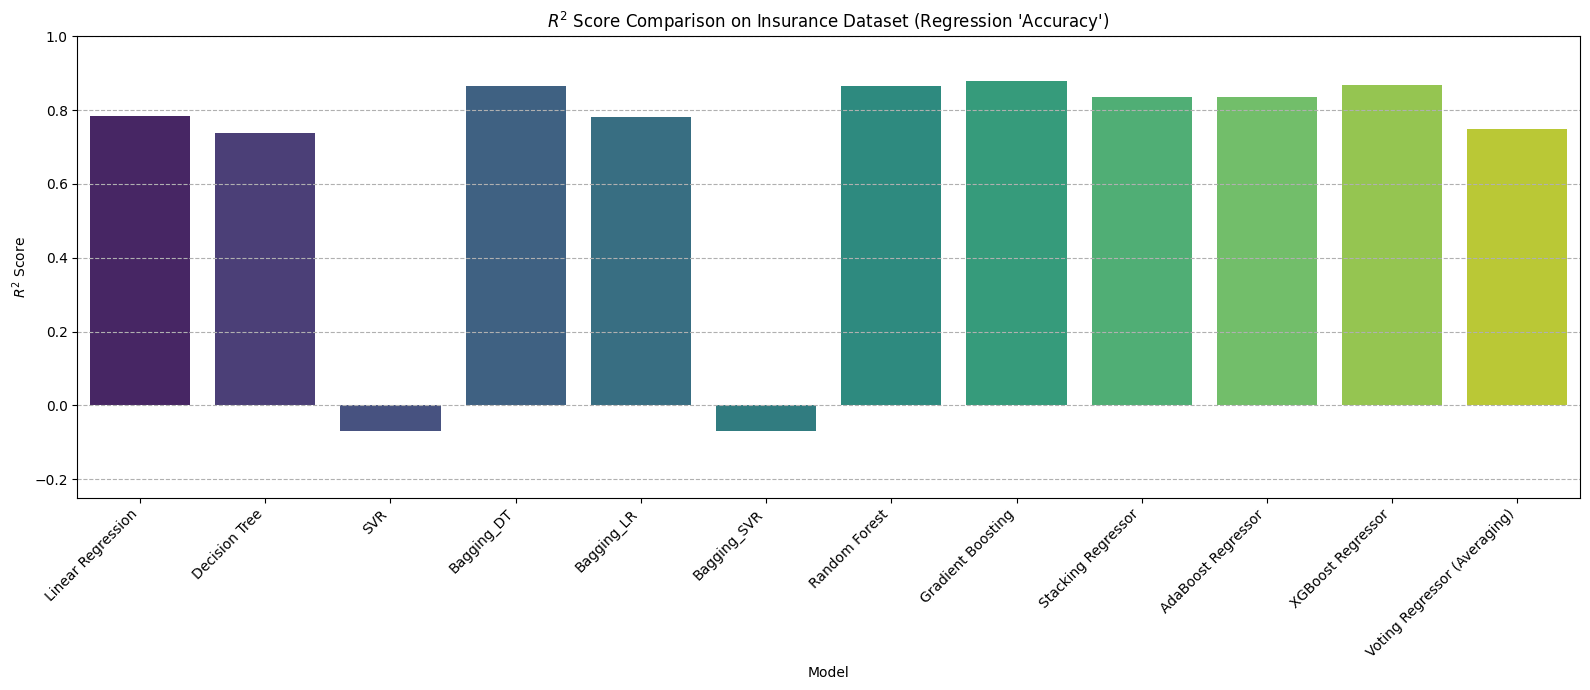

In [ ]:
plt.figure(figsize=(16, 7))
sns.barplot(x=R2_scores.index, y=R2_scores.values, palette="viridis")
plt.title("$R^2$ Score Comparison on Insurance Dataset (Regression 'Accuracy')")
plt.xlabel("Model")
plt.ylabel("$R^2$ Score")
plt.ylim(-0.25, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()